# cleaning the dataset

In [1]:
import pandas as pd

data = pd.read_excel("gwkerela2023.xlsx",header=5)

# Display the first few rows of the dataset
data.head()

,caco3,ph_fld,mgcaco3,tritium,ts,pcb,cocci,Date Collection,barium,odour_code,...,Total Hardness (mg/L),Total Organic Carbon,Total phenols,Tritium,Turbidity (NTU),Uranium,Zinc (mg/L),pH2,pH_Field,ph1
0,-,NaN,-,NaN,NaN,NaN,NaN,2019-05,NaN,NaN,...,-,-,-,-,-,-,-,-,-,-
1,-,NaN,-,NaN,NaN,NaN,NaN,2020-05,NaN,NaN,...,-,-,-,-,-,-,-,-,-,-
2,-,NaN,-,NaN,NaN,NaN,NaN,2021-05,NaN,NaN,...,-,-,-,-,-,-,-,-,-,-
3,-,NaN,-,NaN,NaN,NaN,NaN,2022-04,NaN,NaN,...,-,-,-,-,-,-,-,-,-,-
4,-,NaN,-,NaN,NaN,NaN,NaN,2018-05,NaN,NaN,...,-,-,-,-,-,-,-,-,-,-


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Columns: 175 entries, caco3 to ph1
dtypes: float64(82), object(93)
memory usage: 1.4+ MB


In [3]:
data.describe()

,ph_fld,tritium,ts,pcb,cocci,barium,odour_code,nh3_n,Longitude,org_n,...,do_sat_,ph_gen,_as,fe,carbon_14,ec_fld,rsc,ss,alk_tot,se
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1078.000000,0.0,...,0.0,1078.000000,391.0,391.0,0.0,0.0,560.000000,0.0,390.000000,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.246034,NaN,...,NaN,7.153265,0.0,0.0,NaN,NaN,-0.425183,NaN,56.990430,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.572533,NaN,...,NaN,0.995679,0.0,0.0,NaN,NaN,0.782397,NaN,67.273399,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.893333,NaN,...,NaN,0.000000,0.0,0.0,NaN,NaN,-9.499770,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.875000,NaN,...,NaN,6.710000,0.0,0.0,NaN,NaN,-0.614111,NaN,12.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.333333,NaN,...,NaN,7.280000,0.0,0.0,NaN,NaN,-0.255144,NaN,27.049200,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.683333,NaN,...,NaN,7.770000,0.0,0.0,NaN,NaN,-0.060000,NaN,76.024575,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.197222,NaN,...,NaN,9.930000,0.0,0.0,NaN,NaN,1.619210,NaN,335.246000,NaN


In [4]:
data.columns

Index(['caco3', 'ph_fld', 'mgcaco3', 'tritium', 'ts', 'pcb', 'cocci',
       'Date Collection', 'barium', 'odour_code',
       ...
       'Total Hardness (mg/L)', 'Total Organic Carbon', 'Total phenols',
       'Tritium', 'Turbidity (NTU)', 'Uranium', 'Zinc (mg/L)', 'pH2',
       'pH_Field', 'ph1'],
      dtype='object', length=175)

In [5]:
# Check the structure of the dataset (number of rows, columns, data types)
dataset_info = data.info()

# Identify missing values
missing_values = data.replace("-", pd.NA).isna().sum()

# Display the structure and number of missing values for each column
dataset_info, missing_values.sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Columns: 175 entries, caco3 to ph1
dtypes: float64(82), object(93)
memory usage: 1.4+ MB


(None,
 ph1                                   1081
 Alkalinity, Phenolphthalein (mg/L)    1081
 Phosphorus(Total)                     1081
 Percent Sodium                        1081
 se                                    1081
                                       ... 
 Station Name                             3
 Agency Name                              3
 Longitude                                3
 Date Collection                          3
 ca                                       3
 Length: 175, dtype: int64)

In [6]:
# Define a threshold for dropping columns
threshold = 0.7 * len(data)

# Identify columns with more than 70% missing values
cols_to_drop = missing_values[missing_values > threshold].index

# Drop these columns
data_cleaned = data.drop(columns=cols_to_drop)

# Display the shape of the cleaned dataset and the first few rows
data_cleaned.shape, data_cleaned.head()


((1081, 29),
   Date Collection  Longitude Agency Name Station Name   Latitude  co3   
 0         2019-05     77.125        CGWB   Achenkovil   9.083333  0.0  \
 1         2020-05     77.125        CGWB   Achenkovil   9.083333  NaN   
 2         2021-05     77.125        CGWB   Achenkovil   9.083333  0.0   
 3         2022-04     77.125        CGWB   Achenkovil   9.083333  0.0   
 4         2018-05     76.955        CGWB      Adimali  10.013333  0.0   
 
   District Name  o_po4_p      Sub Basin Name  sio2  ...  har_total      sar   
 0        Kollam      NaN  Periyar and others   NaN  ...       85.0      NaN  \
 1        Kollam      NaN  Periyar and others   NaN  ...        NaN      NaN   
 2        Kollam      NaN  Periyar and others   NaN  ...      540.0      NaN   
 3        Kollam      NaN  Periyar and others   NaN  ...       68.2  1.13000   
 4        Idukki      0.0  Periyar and others   0.0  ...       24.0  1.50649   
 
    ec_gen     na  ph_gen  _as   fe       rsc  alk_tot   
 

In [7]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date Collection  1078 non-null   object 
 1   Longitude        1078 non-null   float64
 2   Agency Name      1078 non-null   object 
 3   Station Name     1078 non-null   object 
 4   Latitude         1078 non-null   float64
 5   co3              906 non-null    float64
 6   District Name    1078 non-null   object 
 7   o_po4_p          391 non-null    float64
 8   Sub Basin Name   1077 non-null   object 
 9   sio2             393 non-null    float64
 10  tds              556 non-null    float64
 11  k                1078 non-null   float64
 12  State Name       1078 non-null   object 
 13  cl               1078 non-null   float64
 14  ca               1078 non-null   float64
 15  hco3             1078 non-null   float64
 16  so4              734 non-null    float64
 17  mg            

In [8]:
data_cleaned

,Date Collection,Longitude,Agency Name,Station Name,Latitude,co3,District Name,o_po4_p,Sub Basin Name,sio2,...,har_total,sar,ec_gen,na,ph_gen,_as,fe,rsc,alk_tot,Basin Name
0,2019-05,77.125000,CGWB,Achenkovil,9.083333,0.0,Kollam,NaN,Periyar and others,NaN,...,85.0,NaN,460.0,34.10,9.37,NaN,NaN,NaN,NaN,West flowing rivers from Tadri to Kanyakumari ...
1,2020-05,77.125000,CGWB,Achenkovil,9.083333,NaN,Kollam,NaN,Periyar and others,NaN,...,NaN,NaN,460.0,34.10,9.37,NaN,NaN,NaN,NaN,West flowing rivers from Tadri to Kanyakumari ...
2,2021-05,77.125000,CGWB,Achenkovil,9.083333,0.0,Kollam,NaN,Periyar and others,NaN,...,540.0,NaN,2740.0,333.50,7.31,NaN,NaN,NaN,NaN,West flowing rivers from Tadri to Kanyakumari ...
3,2022-04,77.125000,CGWB,Achenkovil,9.083333,0.0,Kollam,NaN,Periyar and others,NaN,...,68.2,1.13000,248.0,21.50,7.30,NaN,NaN,-0.030000,NaN,West flowing rivers from Tadri to Kanyakumari ...
4,2018-05,76.955000,CGWB,Adimali,10.013333,0.0,Idukki,0.0,Periyar and others,0.0,...,24.0,1.50649,176.0,17.00,5.04,0.0,0.0,-0.442094,1.96721,West flowing rivers from Tadri to Kanyakumari ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,2021-05,76.956944,CGWB,Yeroor,8.932222,0.0,Kollam,NaN,Periyar and others,NaN,...,240.0,NaN,673.0,48.85,7.55,NaN,NaN,NaN,NaN,West flowing rivers from Tadri to Kanyakumari ...
1077,2022-04,76.956944,CGWB,Yeroor,8.932222,5.0,Kollam,NaN,Periyar and others,NaN,...,131.6,1.73000,372.0,45.70,8.41,NaN,NaN,0.790000,NaN,West flowing rivers from Tadri to Kanyakumari ...
1078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Assuming the row labels are 1078, 1079, 1080 in a 0-based index (like in pandas)
data_cleaned = data_cleaned.dropna(how='all')





In [10]:
data_cleaned


,Date Collection,Longitude,Agency Name,Station Name,Latitude,co3,District Name,o_po4_p,Sub Basin Name,sio2,...,har_total,sar,ec_gen,na,ph_gen,_as,fe,rsc,alk_tot,Basin Name
0,2019-05,77.125000,CGWB,Achenkovil,9.083333,0.0,Kollam,NaN,Periyar and others,NaN,...,85.0,NaN,460.0,34.10,9.37,NaN,NaN,NaN,NaN,West flowing rivers from Tadri to Kanyakumari ...
1,2020-05,77.125000,CGWB,Achenkovil,9.083333,NaN,Kollam,NaN,Periyar and others,NaN,...,NaN,NaN,460.0,34.10,9.37,NaN,NaN,NaN,NaN,West flowing rivers from Tadri to Kanyakumari ...
2,2021-05,77.125000,CGWB,Achenkovil,9.083333,0.0,Kollam,NaN,Periyar and others,NaN,...,540.0,NaN,2740.0,333.50,7.31,NaN,NaN,NaN,NaN,West flowing rivers from Tadri to Kanyakumari ...
3,2022-04,77.125000,CGWB,Achenkovil,9.083333,0.0,Kollam,NaN,Periyar and others,NaN,...,68.2,1.13000,248.0,21.50,7.30,NaN,NaN,-0.030000,NaN,West flowing rivers from Tadri to Kanyakumari ...
4,2018-05,76.955000,CGWB,Adimali,10.013333,0.0,Idukki,0.0,Periyar and others,0.0,...,24.0,1.50649,176.0,17.00,5.04,0.0,0.0,-0.442094,1.96721,West flowing rivers from Tadri to Kanyakumari ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,2018-05,76.239444,CGWB,Vypeen,9.988333,0.0,Ernakulam,0.0,Periyar and others,0.0,...,265.0,2.97231,1080.0,111.00,7.91,0.0,0.0,1.333880,330.32800,West flowing rivers from Tadri to Kanyakumari ...
1074,2019-05,76.956944,CGWB,Yeroor,8.932222,0.0,Kollam,NaN,Periyar and others,NaN,...,140.0,NaN,390.0,15.60,7.84,NaN,NaN,NaN,NaN,West flowing rivers from Tadri to Kanyakumari ...
1075,2020-05,76.956944,CGWB,Yeroor,8.932222,NaN,Kollam,NaN,Periyar and others,NaN,...,NaN,NaN,390.0,15.60,7.84,NaN,NaN,NaN,NaN,West flowing rivers from Tadri to Kanyakumari ...
1076,2021-05,76.956944,CGWB,Yeroor,8.932222,0.0,Kollam,NaN,Periyar and others,NaN,...,240.0,NaN,673.0,48.85,7.55,NaN,NaN,NaN,NaN,West flowing rivers from Tadri to Kanyakumari ...


In [11]:
# Remove the column 'Basin Name'
data_cleaned.drop(columns=['Basin Name'], inplace=True)
data_cleaned.drop(columns=['Station Name'], inplace=True)
data_cleaned.drop(columns=['_as'], inplace=True)
data_cleaned.drop(columns=['fe'], inplace=True)
data_cleaned.drop(columns=['o_po4_p'], inplace=True)
data_cleaned.drop(columns=['co3'], inplace=True)
data_cleaned.drop(columns=['sio2'], inplace=True)

C:\Users\subit\AppData\Local\Temp\ipykernel_13044\937275643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(columns=['Basin Name'], inplace=True)
C:\Users\subit\AppData\Local\Temp\ipykernel_13044\937275643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(columns=['Station Name'], inplace=True)
C:\Users\subit\AppData\Local\Temp\ipykernel_13044\937275643.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [12]:
data_cleaned.head()

,Date Collection,Longitude,Agency Name,Latitude,District Name,Sub Basin Name,tds,k,State Name,cl,...,so4,mg,f,har_total,sar,ec_gen,na,ph_gen,rsc,alk_tot
0,2019-05,77.125,CGWB,9.083333,Kollam,Periyar and others,NaN,10.85,Kerala,92.4264,...,NaN,7.296,0.150,85.0,NaN,460.0,34.1,9.37,NaN,NaN
1,2020-05,77.125,CGWB,9.083333,Kollam,Periyar and others,NaN,10.85,Kerala,92.4264,...,NaN,7.296,0.150,NaN,NaN,460.0,34.1,9.37,NaN,NaN
2,2021-05,77.125,CGWB,9.083333,Kollam,Periyar and others,NaN,68.00,Kerala,269.4200,...,135.0,97.200,0.688,540.0,NaN,2740.0,333.5,7.31,NaN,NaN
3,2022-04,77.125,CGWB,9.083333,Kollam,Periyar and others,NaN,17.30,Kerala,17.6000,...,21.1,6.200,0.310,68.2,1.13000,248.0,21.5,7.30,-0.030000,NaN
4,2018-05,76.955,CGWB,10.013333,Idukki,Periyar and others,0.0,3.60,Kerala,26.0000,...,5.6,1.000,0.120,24.0,1.50649,176.0,17.0,5.04,-0.442094,1.96721


In [13]:
nan_counts = data_cleaned.isna().sum()
nan_counts

Date Collection      0
Longitude            0
Agency Name          0
Latitude             0
District Name        0
Sub Basin Name       1
tds                522
k                    0
State Name           0
cl                   0
ca                   0
hco3                 0
so4                344
mg                   0
f                    0
har_total          172
sar                517
ec_gen               0
na                   0
ph_gen               0
rsc                518
alk_tot            688
dtype: int64

In [14]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1078 entries, 0 to 1077
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date Collection  1078 non-null   object 
 1   Longitude        1078 non-null   float64
 2   Agency Name      1078 non-null   object 
 3   Latitude         1078 non-null   float64
 4   District Name    1078 non-null   object 
 5   Sub Basin Name   1077 non-null   object 
 6   tds              556 non-null    float64
 7   k                1078 non-null   float64
 8   State Name       1078 non-null   object 
 9   cl               1078 non-null   float64
 10  ca               1078 non-null   float64
 11  hco3             1078 non-null   float64
 12  so4              734 non-null    float64
 13  mg               1078 non-null   float64
 14  f                1078 non-null   float64
 15  har_total        906 non-null    float64
 16  sar              561 non-null    float64
 17  ec_gen           10

In [15]:
data_cleaned.interpolate(method='linear', inplace = True)

C:\Users\subit\AppData\Local\Temp\ipykernel_13044\1792064089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.interpolate(method='linear', inplace = True)


In [16]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1078 entries, 0 to 1077
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date Collection  1078 non-null   object 
 1   Longitude        1078 non-null   float64
 2   Agency Name      1078 non-null   object 
 3   Latitude         1078 non-null   float64
 4   District Name    1078 non-null   object 
 5   Sub Basin Name   1077 non-null   object 
 6   tds              1074 non-null   float64
 7   k                1078 non-null   float64
 8   State Name       1078 non-null   object 
 9   cl               1078 non-null   float64
 10  ca               1078 non-null   float64
 11  hco3             1078 non-null   float64
 12  so4              1076 non-null   float64
 13  mg               1078 non-null   float64
 14  f                1078 non-null   float64
 15  har_total        1078 non-null   float64
 16  sar              1075 non-null   float64
 17  ec_gen           10

In [17]:
data_cleaned

,Date Collection,Longitude,Agency Name,Latitude,District Name,Sub Basin Name,tds,k,State Name,cl,...,so4,mg,f,har_total,sar,ec_gen,na,ph_gen,rsc,alk_tot
0,2019-05,77.125000,CGWB,9.083333,Kollam,Periyar and others,NaN,10.85,Kerala,92.4264,...,NaN,7.296,0.150,85.0,NaN,460.0,34.10,9.37,NaN,NaN
1,2020-05,77.125000,CGWB,9.083333,Kollam,Periyar and others,NaN,10.85,Kerala,92.4264,...,NaN,7.296,0.150,312.5,NaN,460.0,34.10,9.37,NaN,NaN
2,2021-05,77.125000,CGWB,9.083333,Kollam,Periyar and others,NaN,68.00,Kerala,269.4200,...,135.000000,97.200,0.688,540.0,NaN,2740.0,333.50,7.31,NaN,NaN
3,2022-04,77.125000,CGWB,9.083333,Kollam,Periyar and others,NaN,17.30,Kerala,17.6000,...,21.100000,6.200,0.310,68.2,1.130000,248.0,21.50,7.30,-0.030000,NaN
4,2018-05,76.955000,CGWB,10.013333,Idukki,Periyar and others,0.000000,3.60,Kerala,26.0000,...,5.600000,1.000,0.120,24.0,1.506490,176.0,17.00,5.04,-0.442094,1.96721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,2018-05,76.239444,CGWB,9.988333,Ernakulam,Periyar and others,0.000000,23.00,Kerala,128.0000,...,17.000000,18.000,0.330,265.0,2.972310,1080.0,111.00,7.91,1.333880,330.32800
1074,2019-05,76.956944,CGWB,8.932222,Kollam,Periyar and others,145.379667,3.30,Kerala,49.0140,...,18.266667,18.240,0.110,140.0,2.661732,390.0,15.60,7.84,1.197910,330.32800
1075,2020-05,76.956944,CGWB,8.932222,Kollam,Periyar and others,290.759333,3.30,Kerala,49.0140,...,19.533333,18.240,0.110,190.0,2.351155,390.0,15.60,7.84,1.061940,330.32800
1076,2021-05,76.956944,CGWB,8.932222,Kollam,Periyar and others,436.139000,2.22,Kerala,74.4450,...,20.800000,19.440,0.080,240.0,2.040577,673.0,48.85,7.55,0.925970,330.32800


In [18]:
nan_counts = data_cleaned.isna().sum()
nan_counts

Date Collection    0
Longitude          0
Agency Name        0
Latitude           0
District Name      0
Sub Basin Name     1
tds                4
k                  0
State Name         0
cl                 0
ca                 0
hco3               0
so4                2
mg                 0
f                  0
har_total          0
sar                3
ec_gen             0
na                 0
ph_gen             0
rsc                3
alk_tot            4
dtype: int64

In [19]:
data_cleaned.dropna(inplace=True)

C:\Users\subit\AppData\Local\Temp\ipykernel_13044\2134642354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.dropna(inplace=True)


In [20]:
nan_counts = data_cleaned.isna().sum()
nan_counts

Date Collection    0
Longitude          0
Agency Name        0
Latitude           0
District Name      0
Sub Basin Name     0
tds                0
k                  0
State Name         0
cl                 0
ca                 0
hco3               0
so4                0
mg                 0
f                  0
har_total          0
sar                0
ec_gen             0
na                 0
ph_gen             0
rsc                0
alk_tot            0
dtype: int64

In [21]:
data_cleaned.shape

(1073, 22)

In [22]:
data_cleaned

,Date Collection,Longitude,Agency Name,Latitude,District Name,Sub Basin Name,tds,k,State Name,cl,...,so4,mg,f,har_total,sar,ec_gen,na,ph_gen,rsc,alk_tot
4,2018-05,76.955000,CGWB,10.013333,Idukki,Periyar and others,0.000000,3.60,Kerala,26.000,...,5.600000,1.00000,0.12,24.000,1.506490,176.00,17.00,5.040,-0.442094,1.967210
5,2021-05,76.955000,CGWB,10.013333,Idukki,Periyar and others,43.110000,1.81,Kerala,10.635,...,4.459400,3.63786,0.94,30.000,1.208245,74.43,8.91,7.925,-0.331047,99.672140
6,2022-04,76.955000,CGWB,10.013333,Idukki,Periyar and others,21.555000,1.70,Kerala,10.600,...,5.300000,1.30000,0.13,23.600,0.910000,119.00,10.10,6.300,-0.220000,197.377070
7,2018-05,76.650000,CGWB,11.100000,Palakkad,Cauvery Middle,0.000000,8.00,Kerala,68.000,...,50.000000,12.00000,0.58,285.000,1.548320,810.00,60.00,7.650,0.224178,295.082000
8,2019-05,76.650000,CGWB,11.100000,Palakkad,Cauvery Middle,115.916667,2.30,Kerala,71.900,...,45.333333,13.70000,0.21,179.336,1.583740,790.00,83.20,6.990,0.205633,237.262322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,2018-05,76.239444,CGWB,9.988333,Ernakulam,Periyar and others,0.000000,23.00,Kerala,128.000,...,17.000000,18.00000,0.33,265.000,2.972310,1080.00,111.00,7.910,1.333880,330.328000
1074,2019-05,76.956944,CGWB,8.932222,Kollam,Periyar and others,145.379667,3.30,Kerala,49.014,...,18.266667,18.24000,0.11,140.000,2.661732,390.00,15.60,7.840,1.197910,330.328000
1075,2020-05,76.956944,CGWB,8.932222,Kollam,Periyar and others,290.759333,3.30,Kerala,49.014,...,19.533333,18.24000,0.11,190.000,2.351155,390.00,15.60,7.840,1.061940,330.328000
1076,2021-05,76.956944,CGWB,8.932222,Kollam,Periyar and others,436.139000,2.22,Kerala,74.445,...,20.800000,19.44000,0.08,240.000,2.040577,673.00,48.85,7.550,0.925970,330.328000


In [23]:
data_cleaned.describe()

,Longitude,Latitude,tds,k,cl,ca,hco3,so4,mg,f,har_total,sar,ec_gen,na,ph_gen,rsc,alk_tot
count,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000
mean,76.242001,10.478647,128.172679,6.804788,47.442315,25.694846,95.712034,17.482551,10.096463,0.201253,114.457041,1.204018,359.440792,29.295264,7.149776,-0.440640,55.534577
std,0.570796,1.201224,195.811276,9.982253,96.128750,28.348085,111.785015,24.358446,19.091211,0.265145,123.313394,0.850700,443.948213,46.579833,0.992903,0.741449,58.816131
min,74.893333,8.316667,0.000000,0.000000,1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.140000,27.140000,1.300000,0.000000,-9.499770,0.000000
25%,75.875000,9.556111,0.000000,2.040000,14.900000,8.000000,20.600000,3.163333,2.200000,0.000000,36.000000,0.670326,129.000000,9.700000,6.710000,-0.602024,14.967200
50%,76.327778,10.702778,41.553333,3.900000,28.000000,16.833600,48.800000,9.000000,4.377600,0.110000,82.000000,1.006825,240.000000,18.000000,7.270000,-0.271076,33.606600
75%,76.676389,11.488611,190.450000,7.600000,46.860000,34.600000,140.300000,21.716667,10.944000,0.280000,155.000000,1.468030,430.000000,33.000000,7.770000,-0.079559,75.278667
max,77.197222,12.724167,1625.000000,140.000000,1465.000000,360.000000,933.300000,227.000000,301.000000,2.090000,2140.000000,9.445340,6320.000000,668.000000,9.930000,1.619210,335.246000


# plotting the data

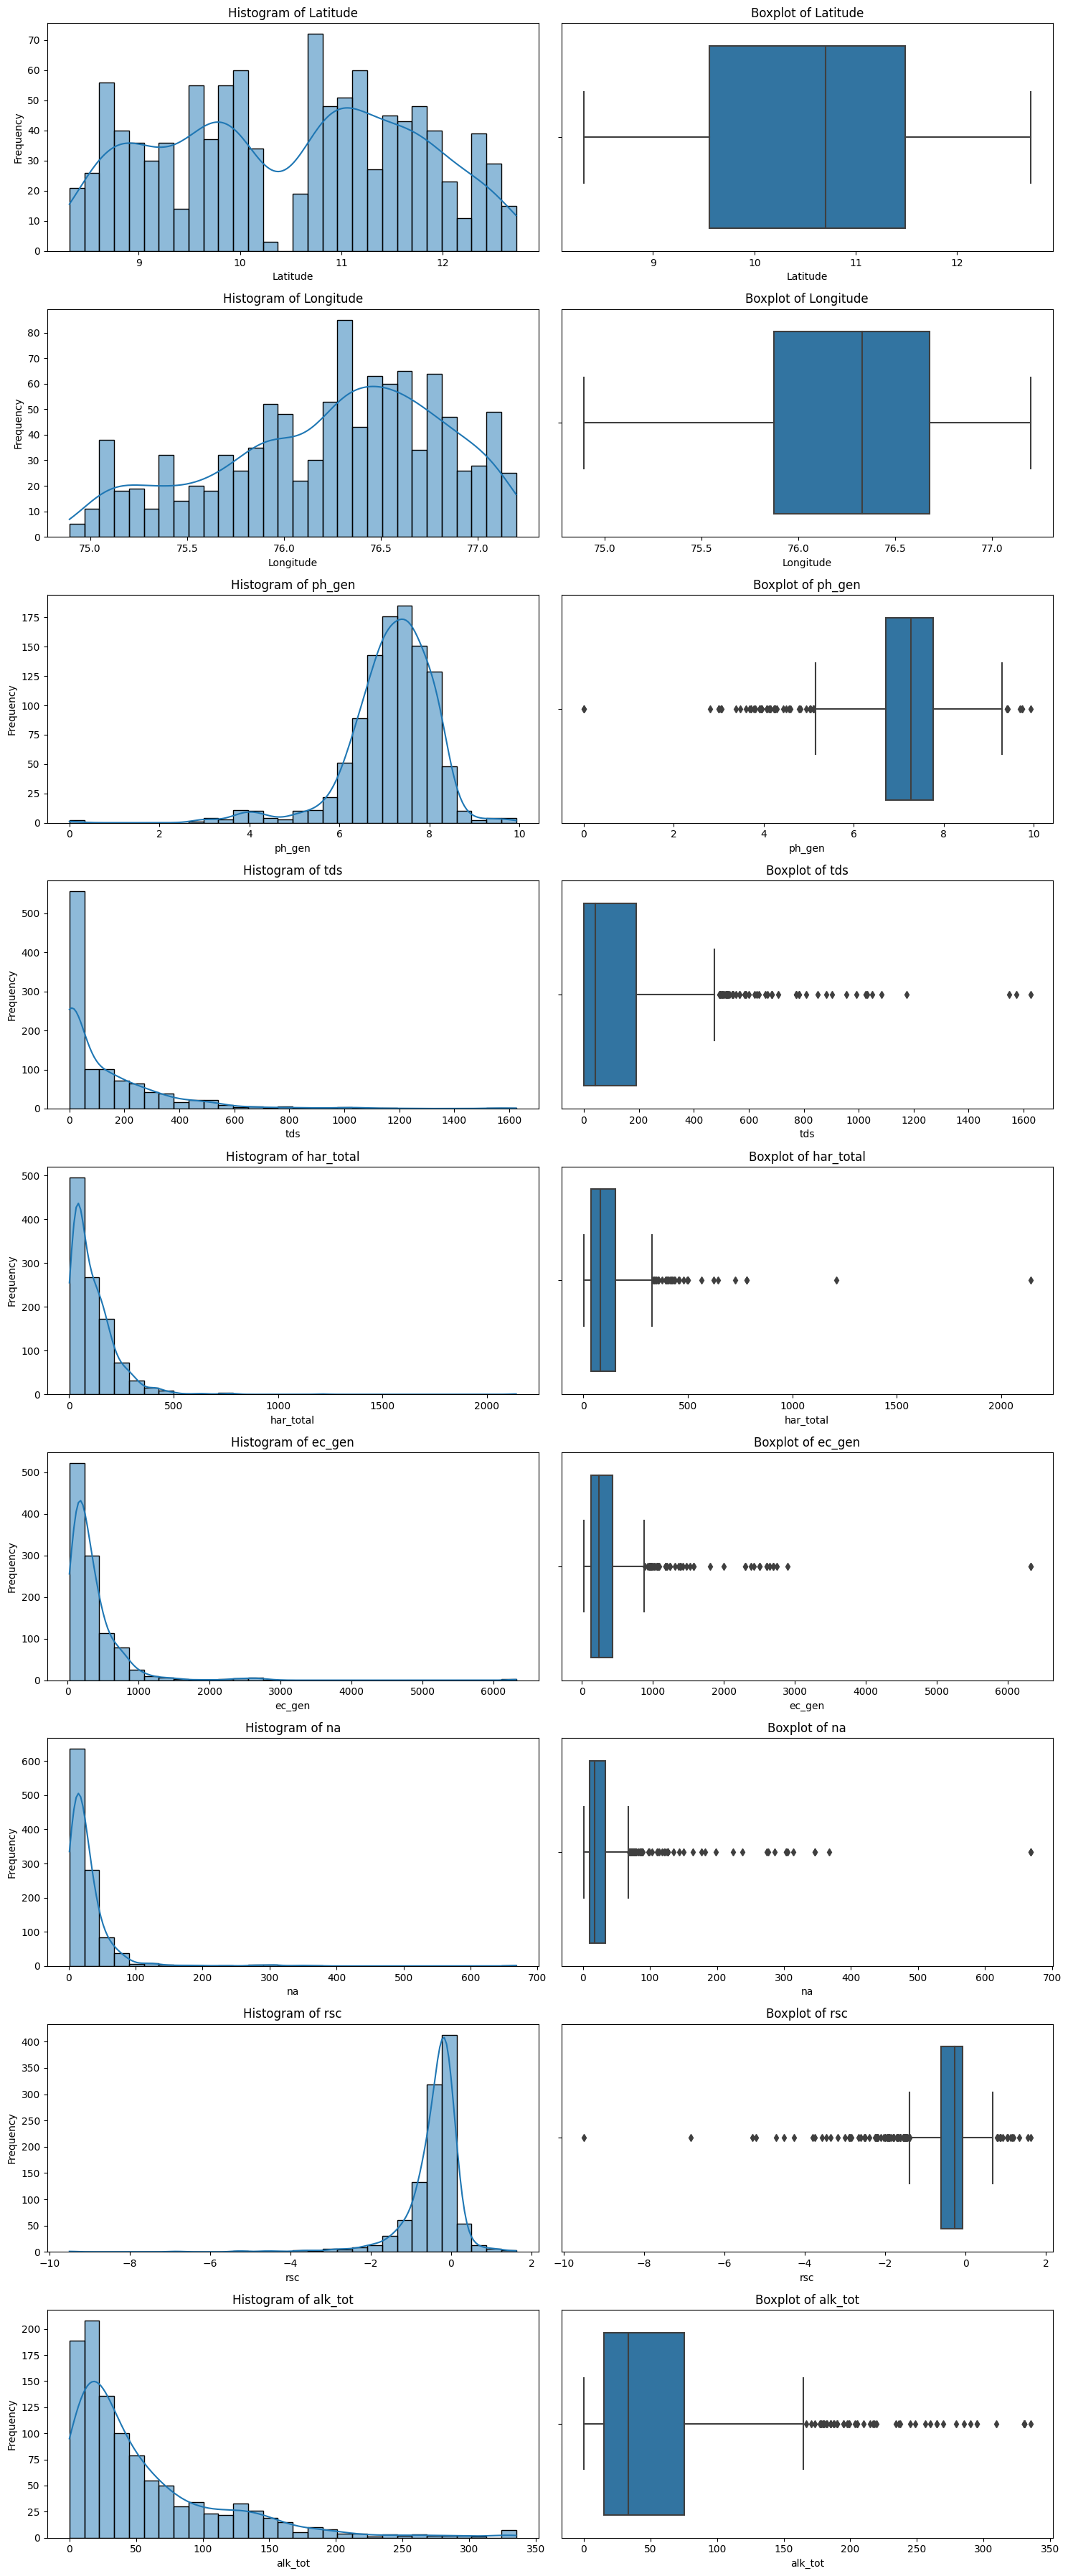

In [24]:
key_features = ["Latitude", "Longitude","ph_gen", "tds", "har_total", "ec_gen", "na", "rsc", "alk_tot"]
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=len(key_features), ncols=2, figsize=(15, 4 * len(key_features)))

for idx, feature in enumerate(key_features):
    # Plotting histogram
    sns.histplot(data_cleaned[feature], ax=axes[idx, 0], kde=True, bins=30)
    axes[idx, 0].set_title(f'Histogram of {feature}')
    axes[idx, 0].set_ylabel('Frequency')

    # Plotting boxplot
    sns.boxplot(x=data_cleaned[feature], ax=axes[idx, 1])
    axes[idx, 1].set_title(f'Boxplot of {feature}')

# Adjusting layout
plt.tight_layout()
plt.show()



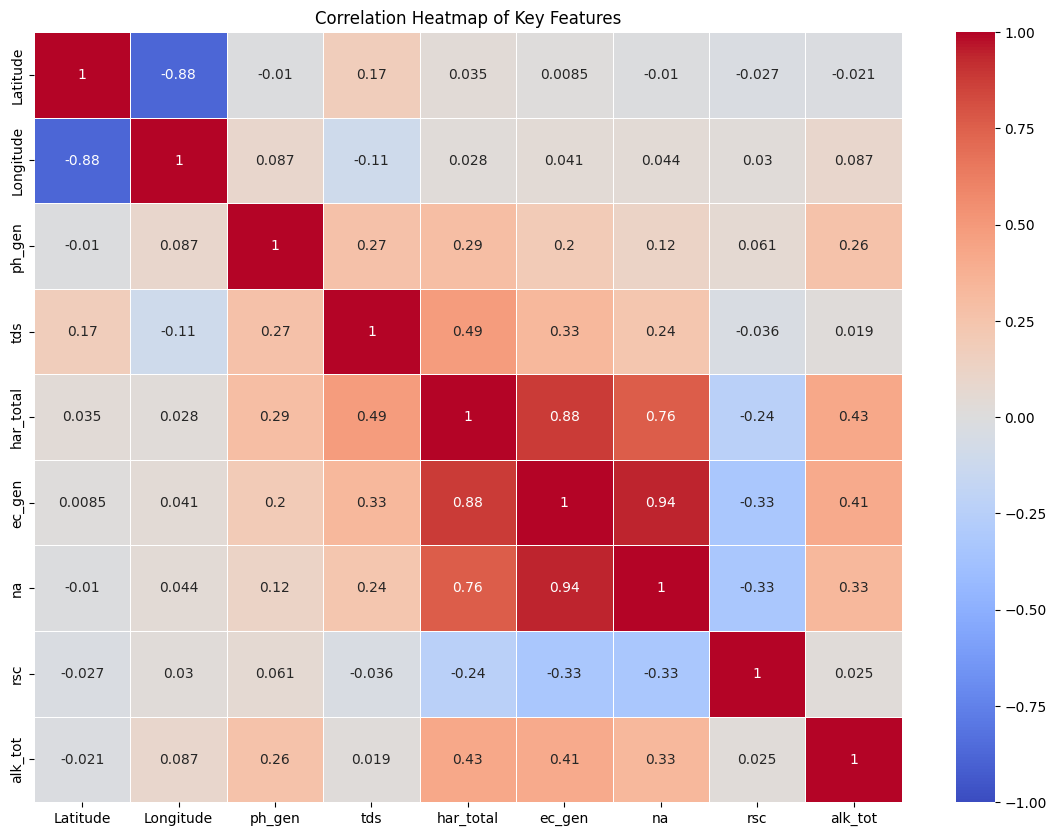

In [25]:
# Compute the correlation matrix for the key features
correlation_matrix = data_cleaned[key_features].corr()

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Correlation Heatmap of Key Features")
plt.show()


In [26]:
data_cleaned.to_csv("output1.csv",index=False)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
# Uncomment the lines below if you have LightGBM and CatBoost installed
import lightgbm as lgb
import catboost as cb

# Load the data
file_path = 'output1.csv'  # Adjust the file path accordingly
data = pd.read_csv(file_path)

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Latitude', 'Longitude','Date Collection', 'Agency Name', 'District Name', 'Sub Basin Name', 'State Name'])

# Define features and targets
features = data_encoded.drop(columns=['tds', 'k', 'cl', 'ca', 'hco3', 'so4', 'mg', 'f', 'har_total', 'sar', 'ec_gen', 'na', 'ph_gen', 'rsc', 'alk_tot'])
target = data_encoded[['tds', 'k', 'cl', 'ca', 'hco3', 'so4', 'mg', 'f', 'har_total', 'sar', 'ec_gen', 'na', 'ph_gen', 'rsc', 'alk_tot']]

# Standardize the data
scaler_features = StandardScaler()
features_scaled = scaler_features.fit_transform(features)
scaler_target = StandardScaler()
target_scaled = scaler_target.fit_transform(target)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(features_scaled, target_scaled, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# SVM Model
svm_model = SVR(kernel='rbf')
multioutput_svm_model = MultiOutputRegressor(svm_model)
multioutput_svm_model.fit(X_train, y_train)

# ANN Model
ann_model = MLPRegressor(activation='tanh', max_iter=500, random_state=42)
ann_model.fit(X_train, y_train)

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(random_state=42)
multioutput_gb_model = MultiOutputRegressor(gb_model)
multioutput_gb_model.fit(X_train, y_train)

#Uncomment the lines below if you have LightGBM and CatBoost installed
 #LightGBM Model
lgb_model = lgb.LGBMRegressor(random_state=42)
multioutput_lgb_model = MultiOutputRegressor(lgb_model)
multioutput_lgb_model.fit(X_train, y_train)

# CatBoost Model
cb_model = cb.CatBoostRegressor(random_state=42, verbose=0)
multioutput_cb_model = MultiOutputRegressor(cb_model)
multioutput_cb_model.fit(X_train, y_train)

# Evaluate models on the validation set
models = [multioutput_svm_model, ann_model, multioutput_gb_model, multioutput_lgb_model, multioutput_cb_model]
model_names = ['SVM', 'ANN', 'Gradient Boosting' , 'LightGBM', 'CatBoost']
for model, name in zip(models, model_names):
    y_val_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_val_pred, multioutput='raw_values')
    print(f'MAE for {name}: {mae}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 63
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 21
[LightGBM] [Info] Start training from score -0.031807
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 63
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 21
[LightGBM] [Info] Start training from score 0.024766
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 63
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 21
[LightGBM] [Info] Start training from score -0.023816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 63
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 21
[LightGBM] [Info] Start training from score 0.024045
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

MAE for SVM: [0.47438516 0.45832675 0.25305591 0.4290978  0.59685997 0.488412
 0.37269401 0.63846142 0.48994701 0.39097054 0.3773405  0.3081114
 0.6480346  0.35539023 0.52251313]
MAE for ANN: [0.85395738 0.9169502  0.61791379 0.73628622 0.74413709 0.8321203
 0.7652337  0.89702355 0.76828716 0.52779388 0.75067876 0.6829069
 0.81632863 0.64153569 0.76401542]
MAE for Gradient Boosting: [0.43956573 0.52016929 0.24739185 0.4750483  0.55604911 0.58174288
 0.33575474 0.61985419 0.46916468 0.5174394  0.39514804 0.35048595
 0.53056803 0.47783609 0.61935649]
MAE for LightGBM: [0.46488936 0.58397405 0.352297   0.55417628 0.58043508 0.58911705
 0.3807951  0.55924279 0.50343389 0.56734547 0.46467122 0.41106888
 0.58856801 0.60214198 0.72843127]
MAE for CatBoost: [0.41226763 0.54681417 0.24040681 0.4533143  0.52258187 0.5395975
 0.34218374 0.60715559 0.45299519 0.46544695 0.37760326 0.31252623
 0.5189105  0.43690749 0.5624    ]


In [28]:
# Generating predictions on the validation set
catboost_predictions = multioutput_cb_model.predict(X_val)
lightgbm_predictions = multioutput_lgb_model.predict(X_val)

# Calculate MAE for CatBoost model
mae_catboost = mean_absolute_error(y_val, catboost_predictions, multioutput='raw_values')

# Calculate MAE for LightGBM model
mae_lightgbm = mean_absolute_error(y_val, lightgbm_predictions, multioutput='raw_values')

# Calculate weights based on the inverse of MAE
weight_catboost = 1 / mae_catboost
weight_lightgbm = 1 / mae_lightgbm

# Calculate the sum of weights
sum_of_weights = weight_catboost + weight_lightgbm

# Calculate the ensemble predictions
ensemble_predictions_weighted = (catboost_predictions * weight_catboost + lightgbm_predictions * weight_lightgbm) / sum_of_weights

# Now ensemble_predictions_weighted contains the predictions of the weighted averaging ensemble

# To calculate the MAE of the ensemble model on the validation set
mae_ensemble_weighted = mean_absolute_error(y_val, ensemble_predictions_weighted, multioutput='raw_values')

print(f'MAE for Weighted Averaging Ensemble: {mae_ensemble_weighted}')


MAE for Weighted Averaging Ensemble: [0.42843875 0.5470793  0.26651493 0.48154182 0.53925732 0.5500325
 0.34817984 0.564748   0.46593118 0.50141497 0.40188393 0.34170617
 0.53162593 0.49722841 0.62994442]


In [29]:

# Assume multioutput_cb_model and multioutput_lgb_model are your trained CatBoost and LightGBM models
# Assume X_val and y_val are your validation data

# Get predictions from both models
catboost_predictions = multioutput_cb_model.predict(X_val)
lightgbm_predictions = multioutput_lgb_model.predict(X_val)

# Average the predictions
blended_predictions = (catboost_predictions + lightgbm_predictions) / 2

# Evaluate the blended model on the validation set
mae_blended = mean_absolute_error(y_val, blended_predictions, multioutput='raw_values')

print(f'MAE for Blended Model: {mae_blended}')

MAE for Blended Model: [0.4298589  0.54725621 0.2780455  0.48666605 0.54088354 0.55106153
 0.34903035 0.56597167 0.46703908 0.5065186  0.40668974 0.34921079
 0.53298643 0.51047479 0.64018127]


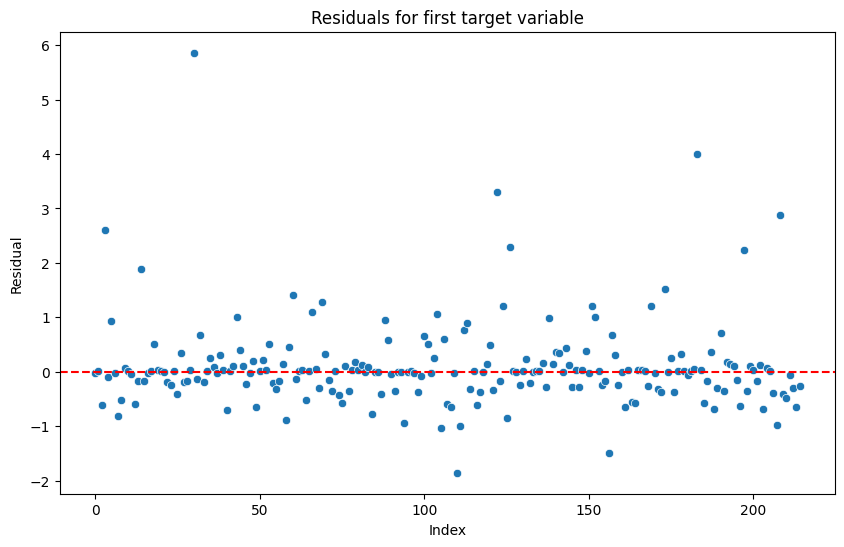

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume y_val is the true values and ensemble_predictions_weighted is the predicted values
residuals = y_val - ensemble_predictions_weighted

# Plotting residuals for the first target variable as an example
plt.figure(figsize=(10,6))
sns.scatterplot(x=range(len(residuals)), y=residuals[:, 0])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals for first target variable')
plt.ylabel('Residual')
plt.xlabel('Index')
plt.show()


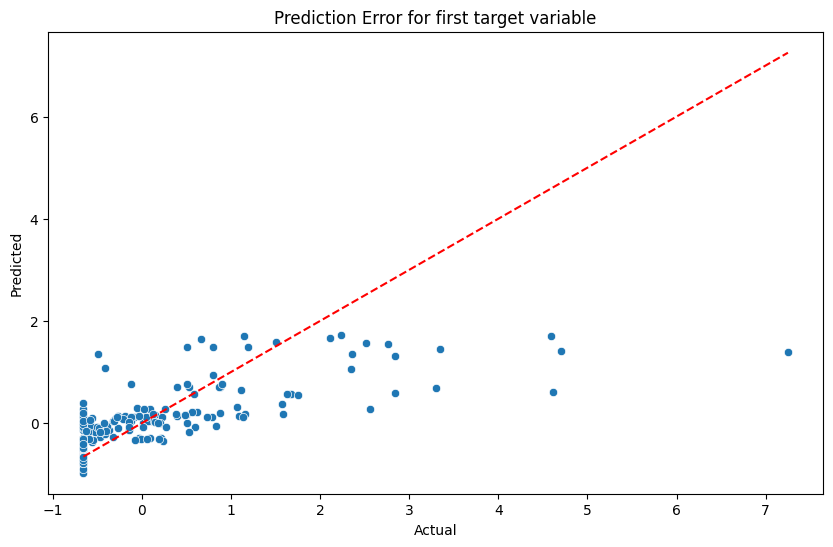

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_val[:, 0], y=ensemble_predictions_weighted[:, 0])
plt.plot([min(y_val[:, 0]), max(y_val[:, 0])], [min(y_val[:, 0]), max(y_val[:, 0])], color='red', linestyle='--')
plt.title('Prediction Error for first target variable')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()


In [32]:
# Step 1: Generate predictions on the test set
catboost_test_predictions = multioutput_cb_model.predict(X_test)
lightgbm_test_predictions = multioutput_lgb_model.predict(X_test)

# Step 2: Calculate the ensemble predictions using the weighted averaging method
ensemble_test_predictions_weighted = (catboost_test_predictions * weight_catboost + lightgbm_test_predictions * weight_lightgbm) / sum_of_weights

# Now ensemble_test_predictions_weighted contains the predictions of the weighted averaging ensemble on the test set

# Step 3: Optionally, calculate the Mean Absolute Error on the test set
mae_test_ensemble_weighted = mean_absolute_error(y_test, ensemble_test_predictions_weighted, multioutput='raw_values')

print(f'MAE for Weighted Averaging Ensemble on Test Set: {mae_test_ensemble_weighted}')


MAE for Weighted Averaging Ensemble on Test Set: [0.37948428 0.53302424 0.35626028 0.52350036 0.50038843 0.55665116
 0.35202506 0.558222   0.47814927 0.56185334 0.41922588 0.38200393
 0.46499216 0.50619615 0.58100093]


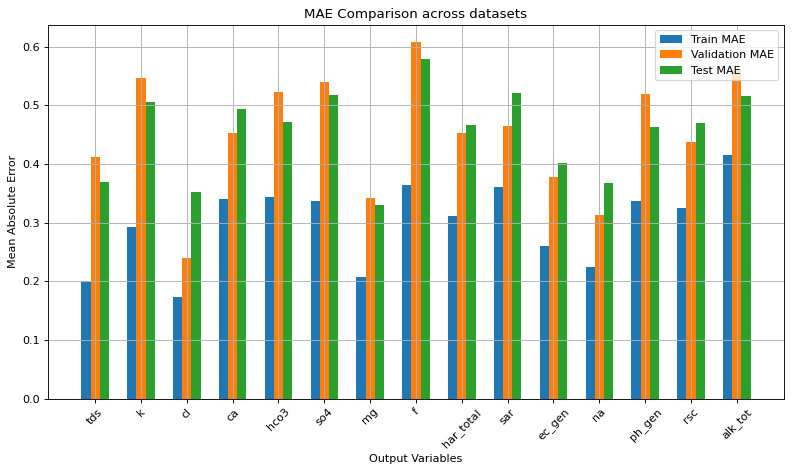

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the model predictions on training, validation, and testing datasets
# as train_predictions, val_predictions, and test_predictions respectively.

# Calculate MAE on Training data
mae_train = mean_absolute_error(y_train, multioutput_cb_model.predict(X_train), multioutput='raw_values')

# Calculate MAE on Validation data
mae_val = mean_absolute_error(y_val, multioutput_cb_model.predict(X_val), multioutput='raw_values')

# Calculate MAE on Test data
mae_test = mean_absolute_error(y_test, multioutput_cb_model.predict(X_test), multioutput='raw_values')

# Create an X axis range for each output variable
x = np.arange(len(mae_train))

# Set up the figure and axis
plt.figure(figsize=(10, 6), dpi=80)
plt.bar(x - 0.2, mae_train, 0.2, label='Train MAE')
plt.bar(x, mae_val, 0.2, label='Validation MAE')
plt.bar(x + 0.2, mae_test, 0.2, label='Test MAE')

plt.xlabel('Output Variables')
plt.ylabel('Mean Absolute Error')
plt.title('MAE Comparison across datasets')
plt.legend()
plt.xticks(ticks=x, labels=target.columns, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
import numpy as np
import pandas as pd

# Assume original_data is your original dataset
original_data = pd.read_csv('output1.csv')

# Separate numerical and categorical columns
numerical_cols = original_data.select_dtypes(include=np.number).columns
categorical_cols = original_data.select_dtypes(exclude=np.number).columns

# Get mean and standard deviation of the numerical data
mean = original_data[numerical_cols].mean()
std = original_data[numerical_cols].std()

# Generate synthetic numerical data
np.random.seed(42)  # for reproducibility
synthetic_numerical_data = np.random.normal(loc=mean, scale=std, size=(100, len(numerical_cols)))

# Convert to DataFrame
synthetic_numerical_data = pd.DataFrame(synthetic_numerical_data, columns=numerical_cols)

# For categorical data, you might want to randomly sample from the original data
synthetic_categorical_data = original_data[categorical_cols].sample(n=100, replace=True, random_state=42).reset_index(drop=True)

# Combine synthetic numerical and categorical data
synthetic_data = pd.concat([synthetic_numerical_data, synthetic_categorical_data], axis=1)

# Now synthetic_data is a DataFrame with synthetic data generated based on the properties of your original data


In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

# Load the original data
original_data = pd.read_csv('output1.csv')

# Assume synthetic_data is your synthetic dataset
# synthetic_data = ...

# Get the list of categorical columns
categorical_columns = ['Latitude', 'Longitude', 'Date Collection', 'Agency Name', 'District Name', 'Sub Basin Name', 'State Name']

# For each categorical column, get the unique categories in the original data
unique_categories = {col: original_data[col].unique() for col in categorical_columns}

# Ensure the synthetic data has the same categories as the original data
for col, unique_cats in unique_categories.items():
    synthetic_data[col] = synthetic_data[col].astype('category').cat.set_categories(unique_cats)

# Now, re-encode the synthetic data
synthetic_data_encoded = pd.get_dummies(synthetic_data, columns=categorical_columns)

# Ensure the synthetic data has the same columns as the original encoded data, filling missing columns with zeros
original_data_encoded = pd.get_dummies(original_data, columns=categorical_columns)
missing_cols = set(original_data_encoded.columns) - set(synthetic_data_encoded.columns)
for col in missing_cols:
    synthetic_data_encoded[col] = 0

# Reorder the columns to match the original encoded data
synthetic_data_encoded = synthetic_data_encoded[original_data_encoded.columns]

# Now you can proceed with the standardization and prediction as before
# ...
catboost_predictions_synthetic = multioutput_cb_model.predict(synthetic_features_scaled)
lightgbm_predictions_synthetic = multioutput_lgb_model.predict(synthetic_features_scaled)

# Calculate the ensemble predictions
ensemble_predictions_synthetic = (catboost_predictions_synthetic * weight_catboost + lightgbm_predictions_synthetic * weight_lightgbm) / sum_of_weights


NameError: name 'synthetic_features_scaled' is not defined